In [160]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

folder_path = os.path.join('project_data', 'bonds')
bgrn_plots = os.path.join('plots', 'bgrn')

ticker = "BGRN"
print(f"Downloading {ticker}...")

try:
    bgrn = yf.download(ticker, period="max", progress=False)
    
    print(f"Downloaded {len(bgrn)} records from {bgrn.index[0].date()} to {bgrn.index[-1].date()}")
    
    file_path = os.path.join(folder_path, f'{ticker}_data.csv')
    bgrn.to_csv(file_path)
        
except Exception as e:
    print(f"Error: {e}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_6984\578880669.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bgrn = yf.download(ticker, period="max", progress=False)


Downloaded 1658 records from 2018-11-27 to 2025-07-03


In [161]:
print(f"Columns: {list(bgrn.columns)}")
print(f"Shape: {bgrn.shape}")

Columns: [('Close', 'BGRN'), ('High', 'BGRN'), ('Low', 'BGRN'), ('Open', 'BGRN'), ('Volume', 'BGRN')]
Shape: (1658, 5)


In [162]:
print("First 5 rows:")
print(bgrn.head())

print("\nLast 5 rows:")
print(bgrn.tail())

print("\nMissing values:")
print(bgrn.isnull().sum())

price_col = "Close"

print(f"\nPrice statistics:")
print(bgrn[price_col].describe())

First 5 rows:
Price           Close       High        Low       Open Volume
Ticker           BGRN       BGRN       BGRN       BGRN   BGRN
Date                                                         
2018-11-27  41.616814  41.616814  41.616814  41.616814    400
2018-11-28  41.554665  41.583663  41.554665  41.563780   1100
2018-11-29  41.554665  41.554665  41.554665  41.554665      0
2018-11-30  41.684746  41.684746  41.684746  41.684746    200
2018-12-03  41.684746  41.684746  41.684746  41.684746      0

Last 5 rows:
Price           Close       High        Low       Open Volume
Ticker           BGRN       BGRN       BGRN       BGRN   BGRN
Date                                                         
2025-06-27  47.333595  47.453174  47.315657  47.315657  17800
2025-06-30  47.502998  47.512965  47.355518  47.433244  19300
2025-07-01  47.480000  47.523998  47.410000  47.509998  21000
2025-07-02  47.509998  47.509998  47.380001  47.419998  23600
2025-07-03  47.400002  47.590000  47.34999

Plot saved to plots\bgrn\BGRN_price_plot.png


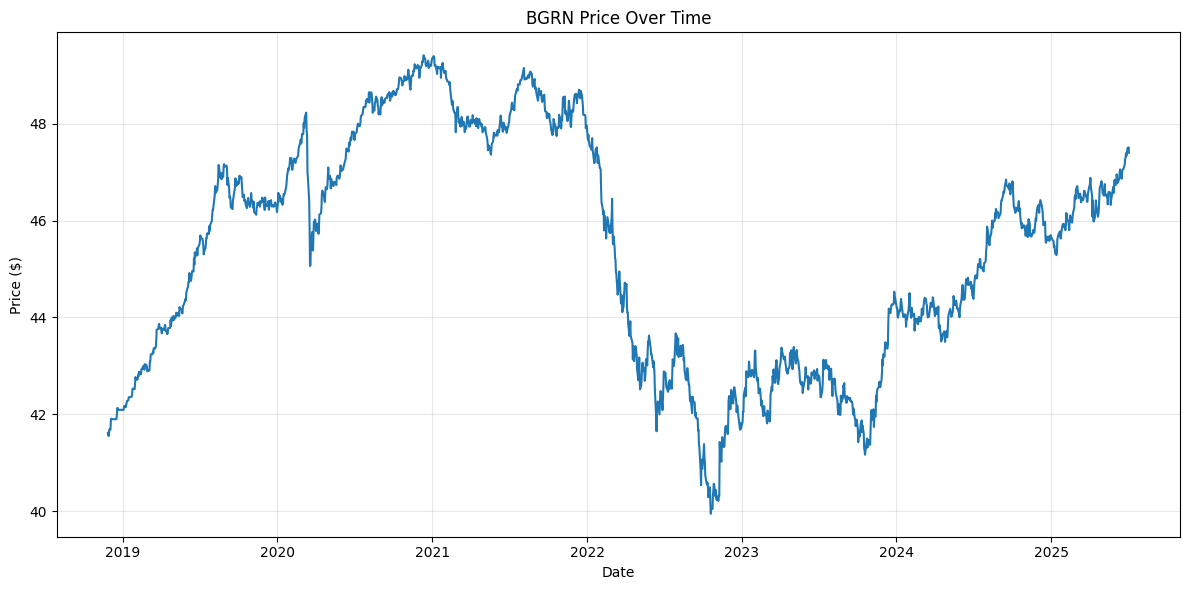

In [163]:
plt.figure(figsize=(12, 6))
plt.plot(bgrn.index, bgrn[price_col])
plt.title(f'{ticker} Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, f'{ticker}_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

This resources is helpfull: https://gregorygundersen.com/blog/2022/02/06/log-returns/

I have to analyze the log returns of the stock prices of BGRN further on. 

There is also an idea to make some P-P plots comparing different indices.

Volume plot saved to plots\bgrn\BGRN_volume_plot


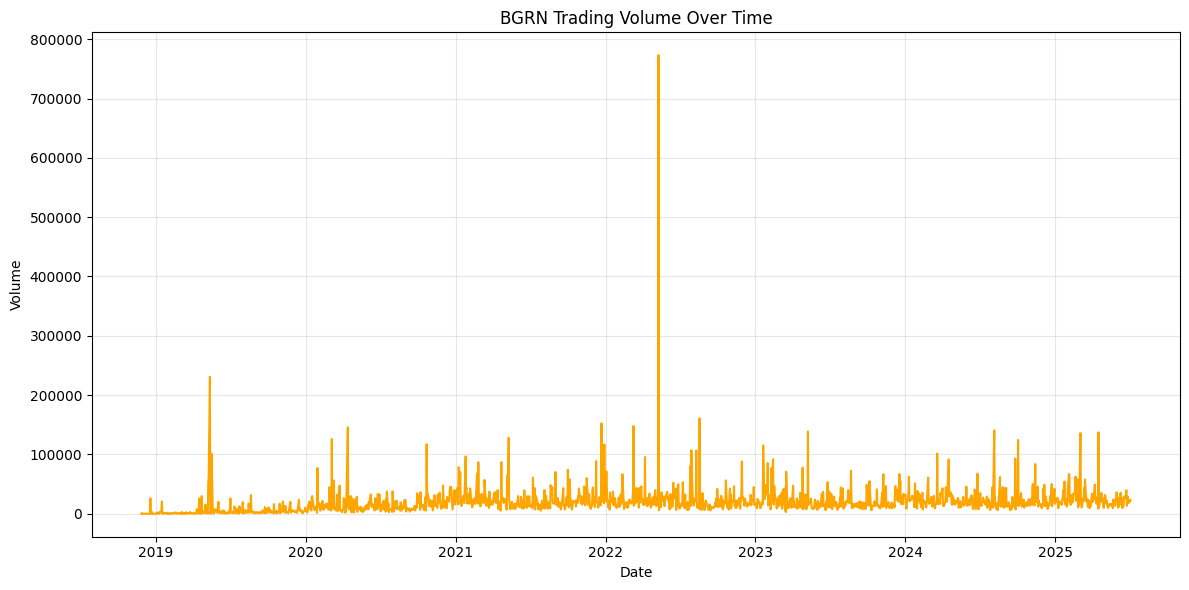

In [164]:
volume_col = 'Volume'

plt.figure(figsize=(12, 6))
plt.plot(bgrn.index, bgrn[volume_col], color='orange')
plt.title(f'BGRN Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, f'BGRN_volume_plot')
plt.savefig(plot_path)
print(f"Volume plot saved to {plot_path}")

plt.show()

**TODO** Explore the outliers.

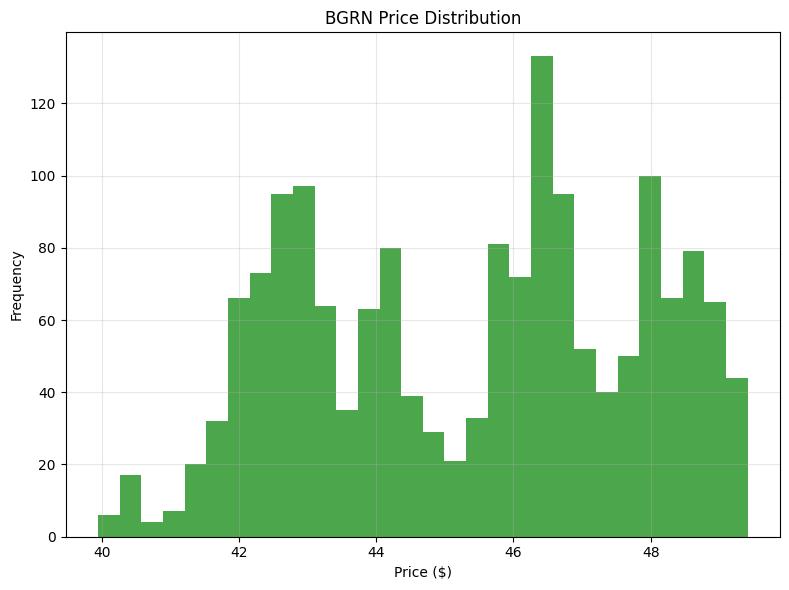

In [165]:
plt.figure(figsize=(8, 6))
plt.hist(bgrn[price_col], bins=30, alpha=0.7, color='green')
plt.title(f'{ticker} Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Most common price range is located around $46-47. Presumably, because of several significant secondary peaks, the stock has had different preffered price levels at different times. In general, the spread shows the stock's typical trading range.

Plot saved to plots\bgrn\BGRN_daily_price_range.png


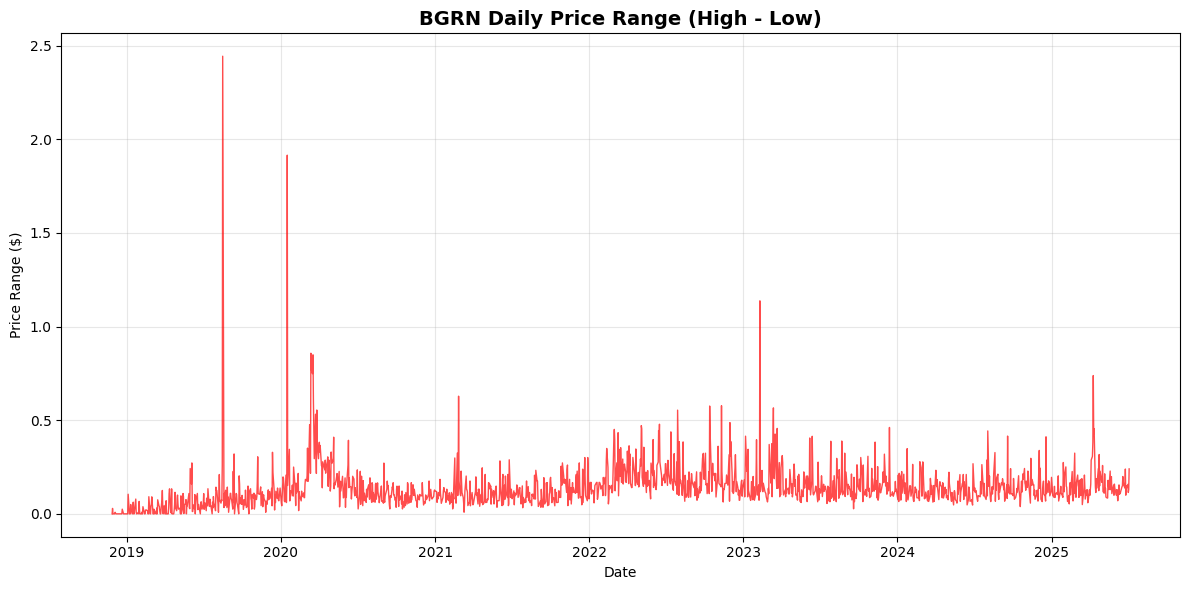

In [166]:
bgrn_daily_range = bgrn['High'] - bgrn['Low']

plt.figure(figsize=(12, 6))

plt.plot(bgrn.index, bgrn_daily_range, linewidth=1, color='red', alpha=0.7)
plt.title('BGRN Daily Price Range (High - Low)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price Range ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, 'BGRN_daily_price_range.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

**TODO** What these visible price range shocks could possibly indicate?

In [167]:
daily_returns = bgrn[price_col].pct_change().dropna()
annual_volatility = daily_returns.std() * np.sqrt(252)

print(f"BGRN annual volatility: {annual_volatility['BGRN']:.1%}")

BGRN annual volatility: 5.2%


Let's calculate the annual volatility of our stock. For that we need to find daily returns and calculate respective standart deviation which gives us the daily volatility. Then by applying square root of time rule we'll be able to find annual volatility. 

https://gregorygundersen.com/blog/2022/05/24/square-root-of-time-rule/


Also in this article, author is actively trying to prove that low-volatility stocks can outperform in the long run the high-volatility stocks. 

https://blogs.cfainstitute.org/investor/2024/02/16/the-low-volatility-factor-and-occams-razor/



In [168]:
avg_daily_change = abs(daily_returns).mean()
print(f"Average daily price movement: {avg_daily_change['BGRN']:.2%}")

Average daily price movement: 0.24%


In [169]:
print("Downloading benchmark data...")

benchmark_indices = ["SPY", "SPLV"]

spy = yf.download(benchmark_indices[0], period="max", progress=False)
splv = yf.download(benchmark_indices[1], period="max", progress=False)

spy.to_csv(os.path.join(folder_path, f'{benchmark_indices[0]}_data.csv'))
splv.to_csv(os.path.join(folder_path, f'{benchmark_indices[1]}_data.csv'))

print(f"{benchmark_indices[0]}: {len(spy)} records from {spy.index[0].date()} to {spy.index[-1].date()}")
print(f"{benchmark_indices[1]}: {len(splv)} records from {splv.index[0].date()} to {splv.index[-1].date()}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_6984\1569303940.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download(benchmark_indices[0], period="max", progress=False)
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_6984\1569303940.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  splv = yf.download(benchmark_indices[1], period="max", progress=False)


SPY: 8163 records from 1993-01-29 to 2025-07-03
SPLV: 3562 records from 2011-05-05 to 2025-07-03


In [170]:
common_start = max(bgrn.index[0], spy.index[0], splv.index[0])
common_end = min(bgrn.index[-1], spy.index[-1], splv.index[-1])

print(f"Comparing over common period: {common_start.date()} to {common_end.date()}")

bgrn_common = bgrn[common_start:common_end]
spy_common = spy[common_start:common_end]
splv_common = splv[common_start:common_end]

bgrn_returns = bgrn_common[price_col].pct_change().dropna()
spy_returns = spy_common[price_col].pct_change().dropna()
splv_returns = splv_common[price_col].pct_change().dropna()

bgrn_vol = bgrn_returns.std() * np.sqrt(252)
spy_vol = spy_returns.std() * np.sqrt(252)
splv_vol = splv_returns.std() * np.sqrt(252)

bgrn_daily = abs(bgrn_returns).mean()
spy_daily = abs(spy_returns).mean()
splv_daily = abs(splv_returns).mean()

print(f"Period: {len(bgrn_returns)} trading days")
print()
print("Annual Volatility:")
print(f"BGRN (ESG ETF):           {bgrn_vol['BGRN']:.2%}")
print(f"SPY (S&P 500):            {spy_vol['SPY']:.2%}")
print(f"SPLV (S&P 500 Low Vol):   {splv_vol['SPLV']:.2%}")
print()
print("Average Daily Movement:")
print(f"BGRN:  {bgrn_daily['BGRN']:.2%}")
print(f"SPY:   {spy_daily['SPY']:.2%}")
print(f"SPLV:  {splv_daily['SPLV']:.2%}")
print()
print(f"BGRN vs SPY: {bgrn_vol['BGRN']/spy_vol['SPY']:.2f}x the volatility")
print(f"BGRN vs SPLV: {bgrn_vol['BGRN']/splv_vol['SPLV']:.2f}x the volatility")
print(f"SPLV vs SPY: {splv_vol['SPLV']/spy_vol['SPY']:.2f}x the volatility")

Comparing over common period: 2018-11-27 to 2025-07-03
Period: 1657 trading days

Annual Volatility:
BGRN (ESG ETF):           5.22%
SPY (S&P 500):            20.44%
SPLV (S&P 500 Low Vol):   17.62%

Average Daily Movement:
BGRN:  0.24%
SPY:   0.84%
SPLV:  0.68%

BGRN vs SPY: 0.26x the volatility
BGRN vs SPLV: 0.30x the volatility
SPLV vs SPY: 0.86x the volatility


Plot saved to plots\bgrn\comparison_price_plot.png


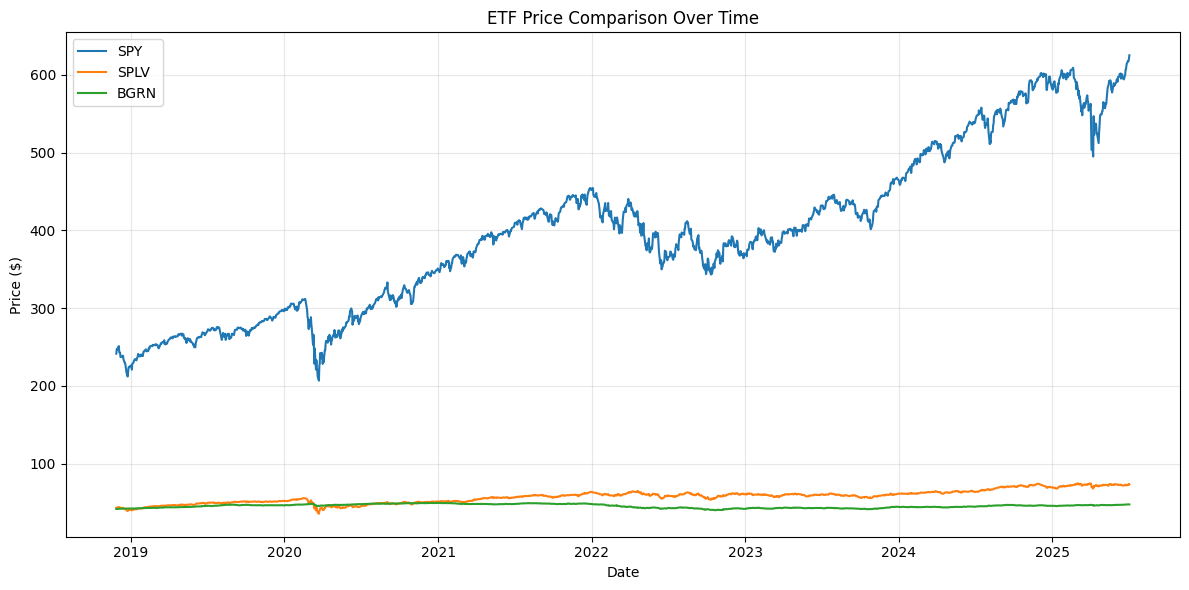

In [171]:
plt.figure(figsize=(12, 6))

plt.plot(spy_common.index, spy_common[price_col], label=benchmark_indices[0])
plt.plot(splv_common.index, splv_common[price_col], label=benchmark_indices[1])
plt.plot(bgrn.index, bgrn[price_col], label=ticker)

plt.title("ETF Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, 'comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\bgrn\normalized_comparison_price_plot.png


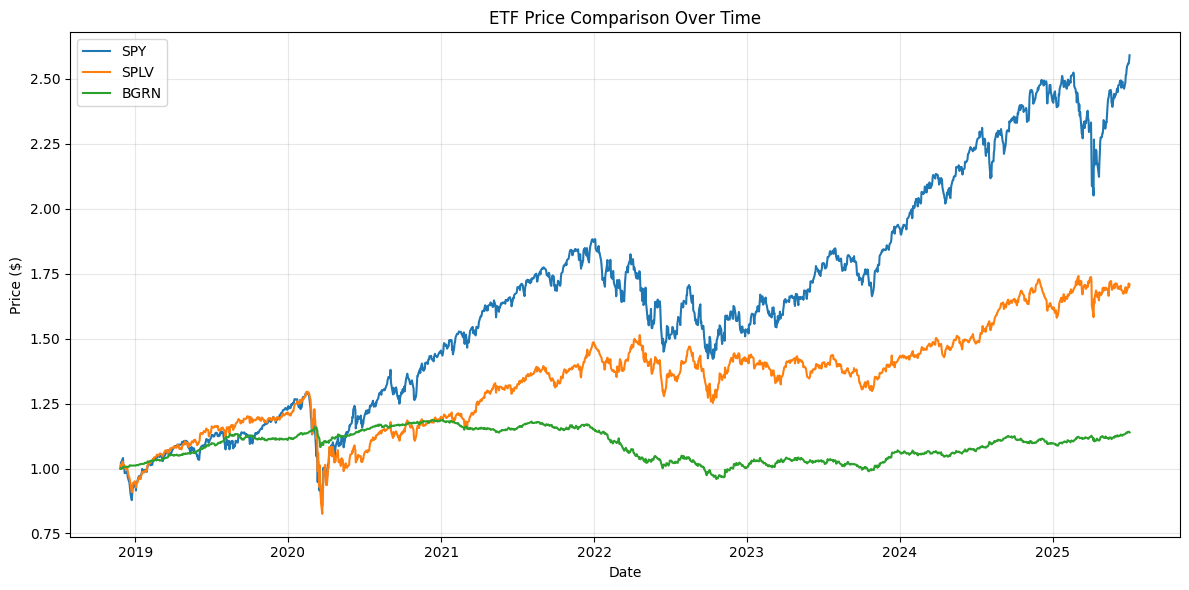

In [172]:
spy_norm = spy_common[price_col] / spy_common[price_col].iloc[0]
splv_norm = splv_common[price_col] / splv_common[price_col].iloc[0]
bgrn_norm = bgrn[price_col] / bgrn[price_col].iloc[0]

plt.figure(figsize=(12, 6))

plt.plot(spy_common.index, spy_norm, label=benchmark_indices[0])
plt.plot(splv_common.index, splv_norm, label=benchmark_indices[1])
plt.plot(bgrn_common.index, bgrn_norm, label=ticker)

plt.title("ETF Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, 'normalized_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

As we can see, BGRN shows minimal price movement. It can be compared to SPLV, which performs better in terms of returns. However, the explnation though is quite simple: BGRN is a bond ETF, while SPY and SPLV are stock ETFs. That's why BGRN has much lower price fluctuations and volatility.

https://www.ishares.com/us/products/305296/ishares-usd-green-bond-etf

Then let's perform a benchmarking analysis of the BGRN compared to other bonds.

In [173]:
agg = yf.download("AGG", period="max", progress=False)  # Total Bond Market
lqd = yf.download("LQD", period="max", progress=False)  # Investment Grade Corporate
tlt = yf.download("TLT", period="max", progress=False)  # Long-Term Treasury
hyg = yf.download("HYG", period="max", progress=False)  # High Yield (for contrast)

for ticker, data in [("AGG", agg), ("LQD", lqd), ("TLT", tlt), ("HYG", hyg)]:
    data.to_csv(os.path.join(folder_path, f'{ticker}_data.csv'))
    print(f"{ticker}: {len(data)} records from {data.index[0].date()} to {data.index[-1].date()}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_6984\1100330799.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  agg = yf.download("AGG", period="max", progress=False)  # Total Bond Market
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_6984\1100330799.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  lqd = yf.download("LQD", period="max", progress=False)  # Investment Grade Corporate
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_6984\1100330799.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tlt = yf.download("TLT", period="max", progress=False)  # Long-Term Treasury
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_6984\1100330799.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hyg = yf.download("HYG", period="max", progress=False)  # High Yield (for contrast)


AGG: 5476 records from 2003-09-29 to 2025-07-03
LQD: 5770 records from 2002-07-30 to 2025-07-03
TLT: 5770 records from 2002-07-30 to 2025-07-03
HYG: 4588 records from 2007-04-11 to 2025-07-03


AGG includes over 10,000 U.S.-issued fixed income securities, ranging from Treasury bonds and mortgage-backed securities (MBS) to investment-grade corporate debt. It basically represents the entire bond ETF market.

LQD represents corporate bonds from financially stable companies with high credit ratings. It reflects the performance of investment-grade corporate debt as a more specific segment of the market.

TLT consists of long-term U.S. government bonds that are highly sensitive to interest rate changes. It allows for observing how long-duration government bonds behave under changing macroeconomic conditions.

HYG contains high-yield, or “junk,” corporate bonds with higher risk and potentially higher returns. It captures the behavior of the riskiest part of the bond market for comparison.

In [174]:
common_start = max(bgrn.index[0], agg.index[0], lqd.index[0], tlt.index[0], hyg.index[0])
common_end = min(bgrn.index[-1], agg.index[-1], lqd.index[-1], tlt.index[-1], hyg.index[-1])

bond_data = {}
for name, df in [("BGRN", bgrn), ("AGG", agg), ("LQD", lqd), ("TLT", tlt), ("HYG", hyg)]:
    bond_data[name] = df[common_start:common_end][price_col]

bond_prices = pd.concat(bond_data.values(), axis=1)
bond_prices.columns = bond_data.keys()

print(f"Analysis period: {common_start.date()} to {common_end.date()}")
print(f"Total observations: {len(bond_prices)}")


Analysis period: 2018-11-27 to 2025-07-03
Total observations: 1658


Plot saved to plots\bgrn\bond_comparison_price_plot.png


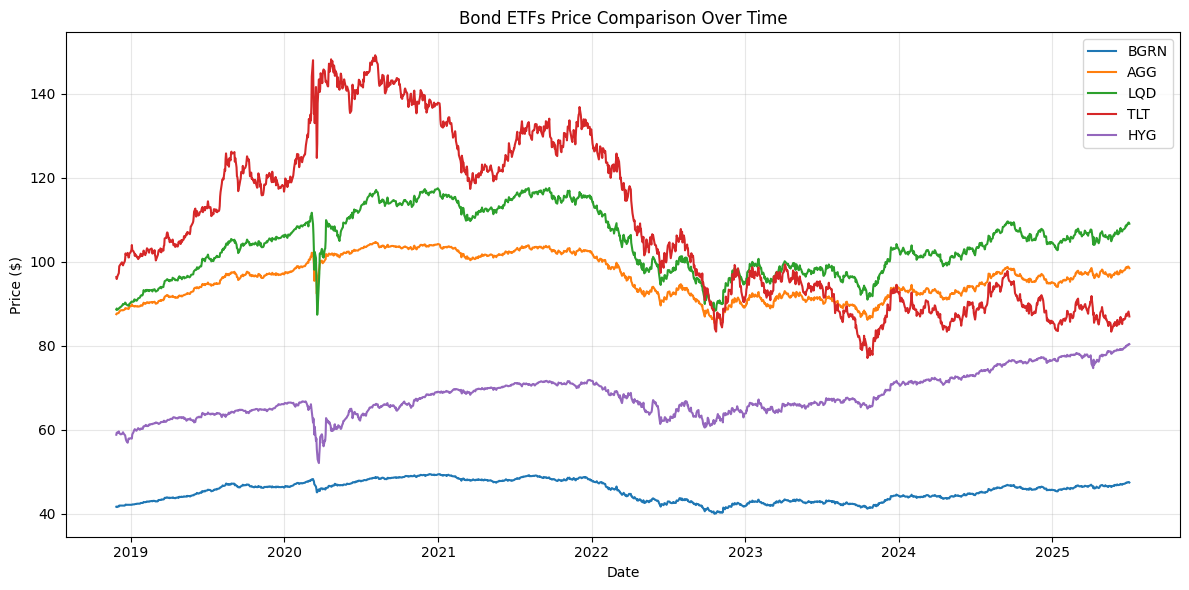

In [175]:
plt.figure(figsize=(12, 6))

plt.plot(bond_prices.index, bond_prices['BGRN'], label='BGRN')
plt.plot(bond_prices.index, bond_prices['AGG'], label='AGG')
plt.plot(bond_prices.index, bond_prices['LQD'], label='LQD')
plt.plot(bond_prices.index, bond_prices['TLT'], label='TLT')
plt.plot(bond_prices.index, bond_prices['HYG'], label='HYG')

plt.title("Bond ETFs Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, 'bond_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\bgrn\normalized_bond_comparison_price_plot.png


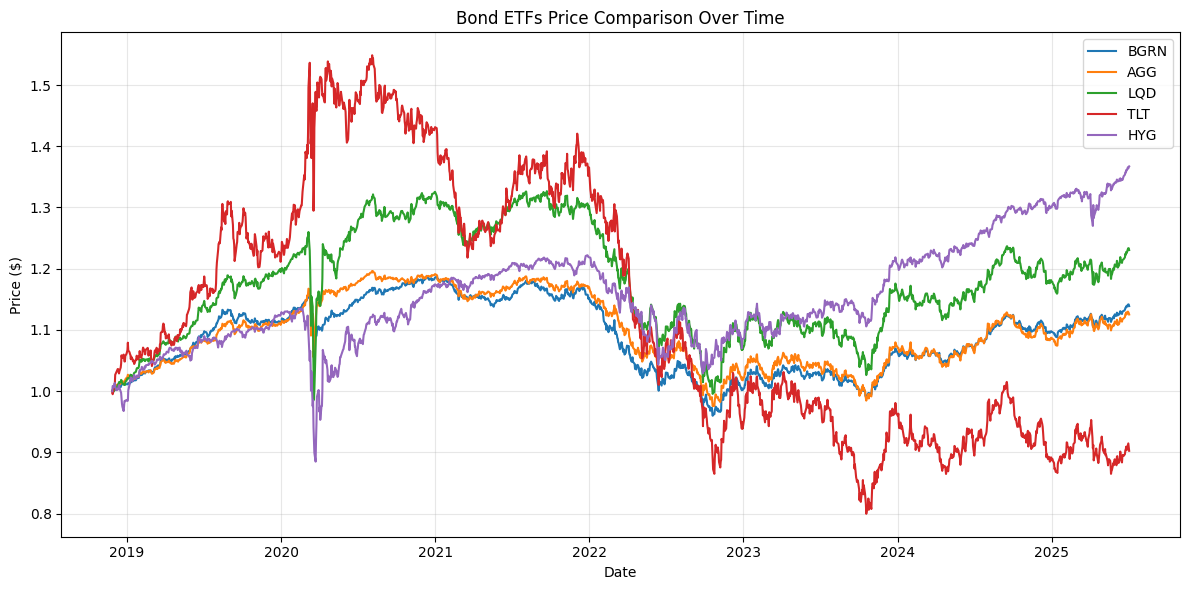

In [176]:
bond_norm = bond_prices / bond_prices.iloc[0]


plt.figure(figsize=(12, 6))

plt.plot(bond_norm.index, bond_norm['BGRN'], label='BGRN')
plt.plot(bond_norm.index, bond_norm['AGG'], label='AGG')
plt.plot(bond_norm.index, bond_norm['LQD'], label='LQD')
plt.plot(bond_norm.index, bond_norm['TLT'], label='TLT')
plt.plot(bond_norm.index, bond_norm['HYG'], label='HYG')

plt.title("Bond ETFs Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, 'normalized_bond_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

There appears to be a strong correlation between BGRN and AGG. I need to investigate this further. In general, it showed neither the best nor the worst results in terms of price changes throughout the years. BGRN exhibits typical behaviour for a bond ETF.

Plot saved to plots\bgrn\bond_daily_returns_comparison_price_plot.png


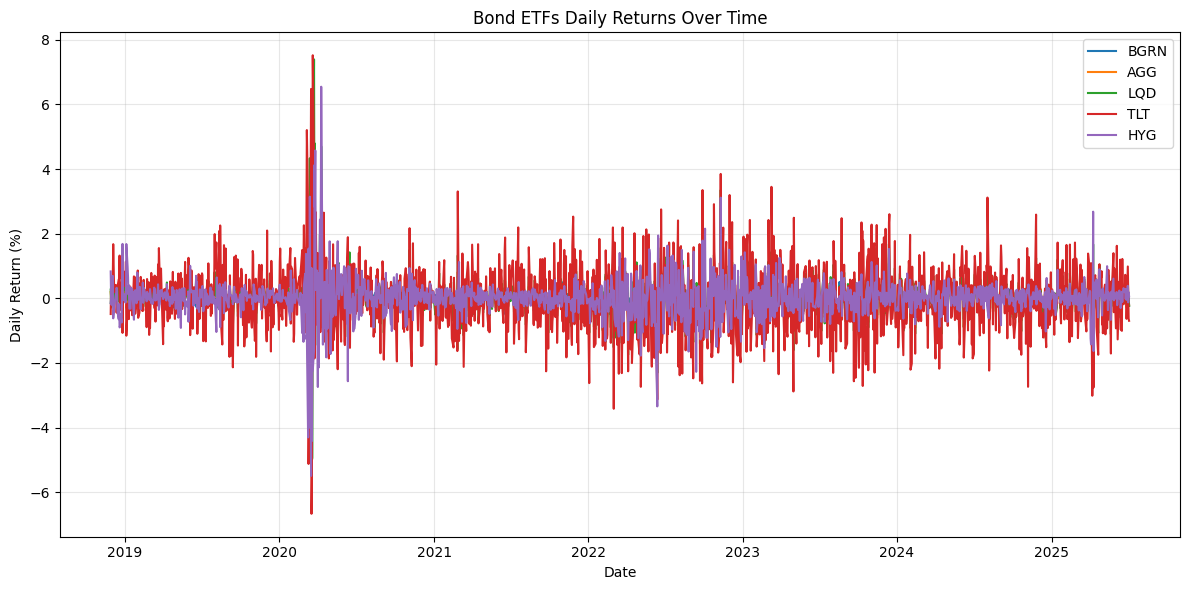

In [177]:
bond_returns = bond_prices.pct_change().dropna() * 100

plt.figure(figsize=(12, 6))

plt.plot(bond_returns.index, bond_returns['BGRN'], label='BGRN')
plt.plot(bond_returns.index, bond_returns['AGG'], label='AGG')
plt.plot(bond_returns.index, bond_returns['LQD'], label='LQD')
plt.plot(bond_returns.index, bond_returns['TLT'], label='TLT')
plt.plot(bond_returns.index, bond_returns['HYG'], label='HYG')

plt.title("Bond ETFs Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, 'bond_daily_returns_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\bgrn\BGRN_AGG_daily_returns_comparison_price_plot.png


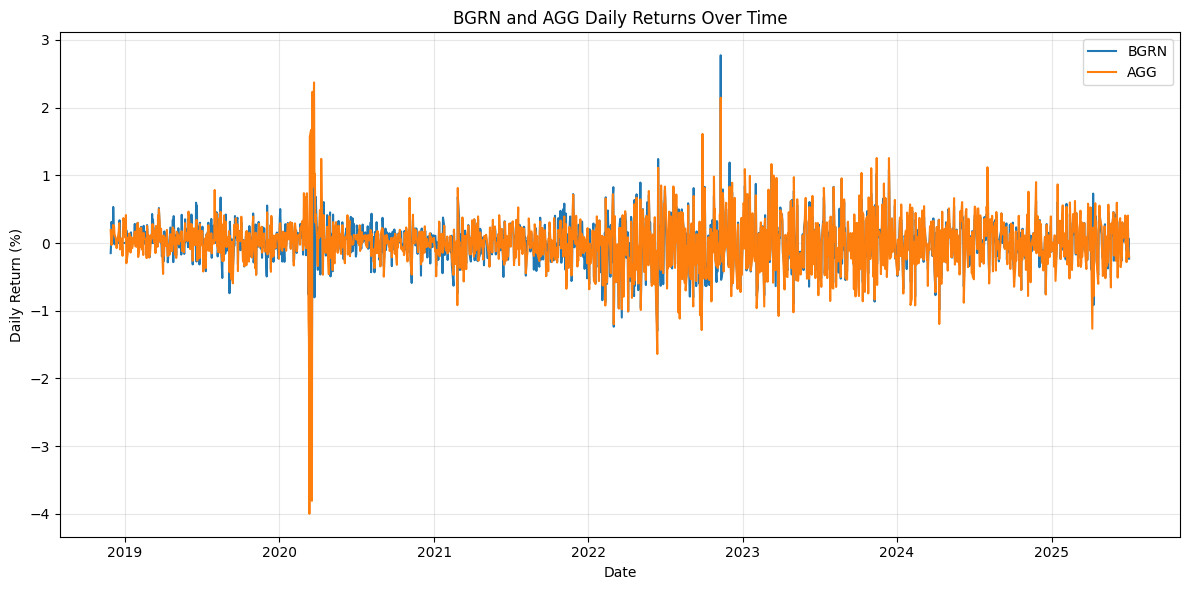

In [178]:
plt.figure(figsize=(12, 6))

plt.plot(bond_returns.index, bond_returns['BGRN'], label='BGRN')
plt.plot(bond_returns.index, bond_returns['AGG'], label='AGG')

plt.title("BGRN and AGG Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, 'BGRN_AGG_daily_returns_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\bgrn\BGRN_daily_returns_comparison_price_plot.png


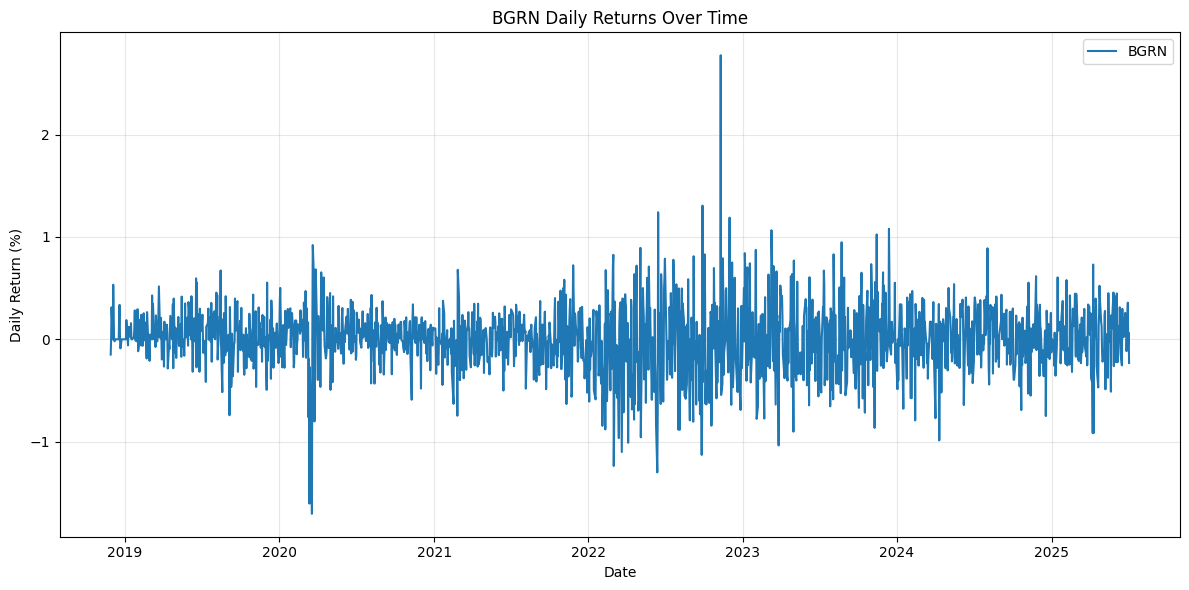

In [179]:
plt.figure(figsize=(12, 6))

plt.plot(bond_returns.index, bond_returns['BGRN'], label='BGRN')

plt.title("BGRN Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, 'BGRN_daily_returns_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\bgrn\BGRN_rolling_volatility_plot.png


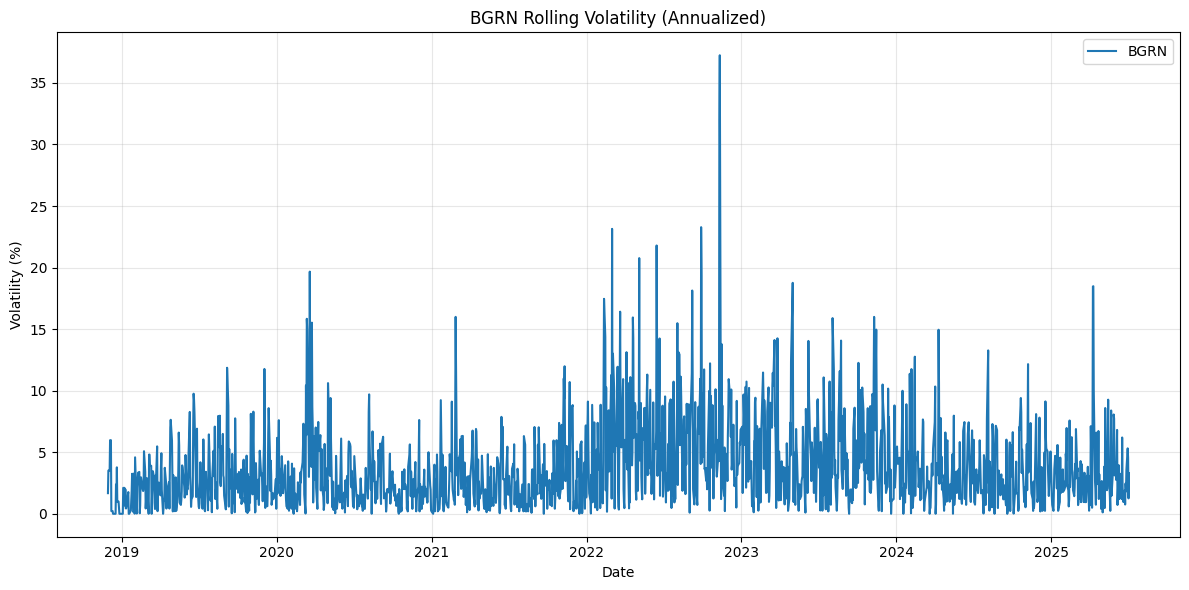

In [180]:
plt.figure(figsize=(12, 6))

plt.plot(bond_returns.index, bond_returns['BGRN'].rolling(window=2).std() * np.sqrt(252), label='BGRN')

plt.title("BGRN Rolling Volatility (Annualized)")
plt.xlabel('Date')
plt.ylabel('Volatility (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, 'BGRN_rolling_volatility_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\bgrn\bond_weekly_returns_comparison_price_plot.png


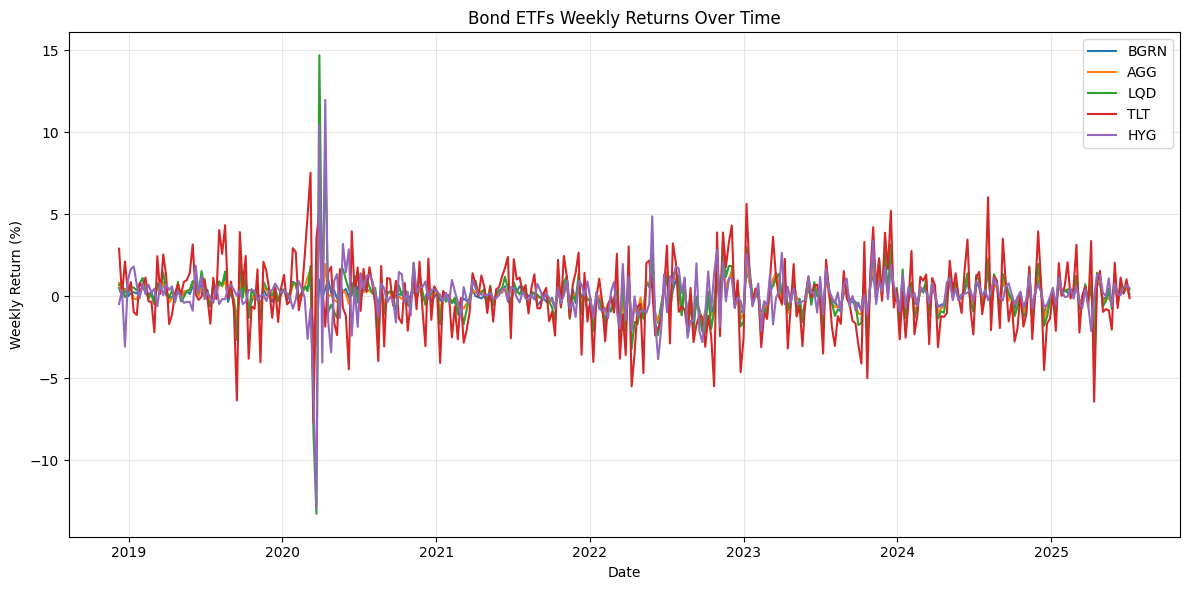

In [181]:
weekly_bond_prices = bond_prices.resample('W').last()
bond_log_returns = weekly_bond_prices.pct_change().dropna() * 100

plt.figure(figsize=(12, 6))

plt.plot(bond_log_returns.index, bond_log_returns['BGRN'], label='BGRN')
plt.plot(bond_log_returns.index, bond_log_returns['AGG'], label='AGG')
plt.plot(bond_log_returns.index, bond_log_returns['LQD'], label='LQD')
plt.plot(bond_log_returns.index, bond_log_returns['TLT'], label='TLT')
plt.plot(bond_log_returns.index, bond_log_returns['HYG'], label='HYG')

plt.title("Bond ETFs Weekly Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Weekly Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(bgrn_plots, 'bond_weekly_returns_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

In [182]:
correlation_matrix = bond_returns.corr()

print(correlation_matrix.round(3))

       BGRN    AGG    LQD    TLT    HYG
BGRN  1.000  0.836  0.751  0.760  0.422
AGG   0.836  1.000  0.842  0.832  0.398
LQD   0.751  0.842  1.000  0.669  0.590
TLT   0.760  0.832  0.669  1.000  0.074
HYG   0.422  0.398  0.590  0.074  1.000


Plot saved to plots\bgrn\bond_correlation_matrix.png


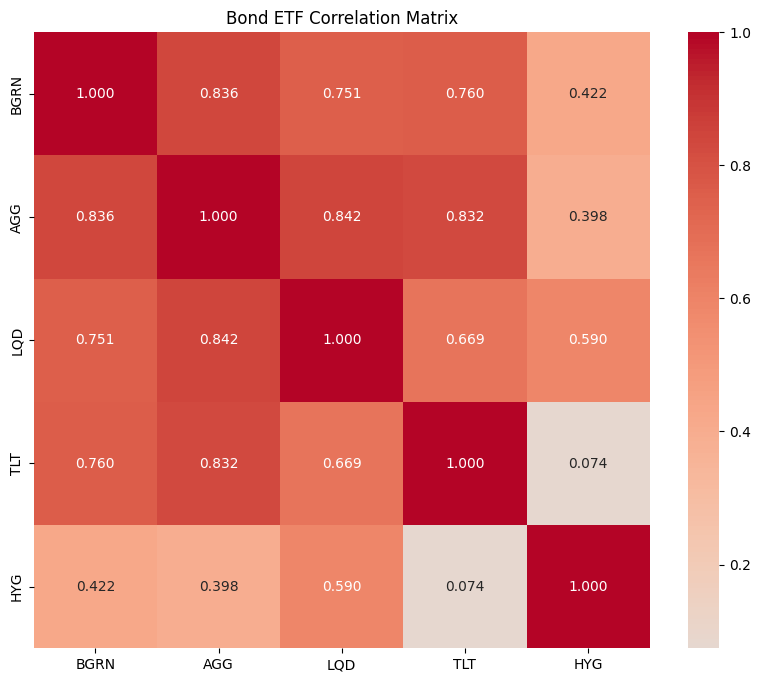

In [183]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Bond ETF Correlation Matrix')

plot_path = os.path.join(bgrn_plots, 'bond_correlation_matrix.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\bgrn\bond_rolling_correlation_plot.png


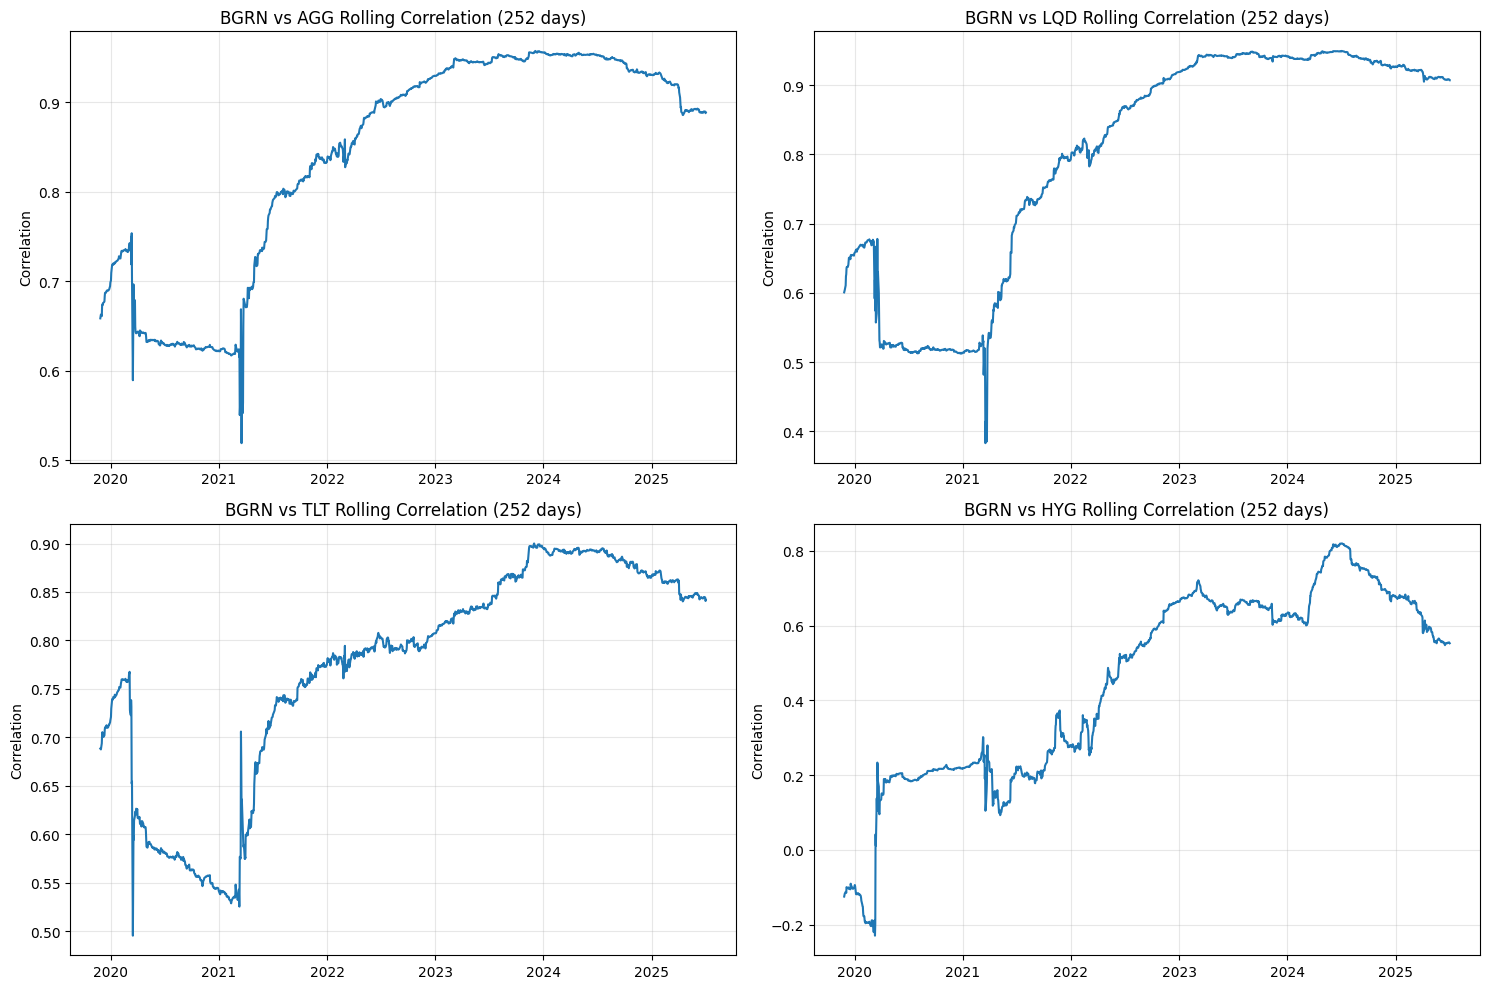

In [184]:
window = 252
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

benchmarks = ['AGG', 'LQD', 'TLT', 'HYG']
for i, benchmark in enumerate(benchmarks):
    row, col = i // 2, i % 2
    rolling_corr = bond_returns['BGRN'].rolling(window).corr(bond_returns[benchmark])
    axes[row, col].plot(rolling_corr.index, rolling_corr.values)
    axes[row, col].set_title(f'BGRN vs {benchmark} Rolling Correlation ({window} days)')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_ylabel('Correlation')


plot_path = os.path.join(bgrn_plots, 'bond_rolling_correlation_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.tight_layout()
plt.show()

As we can see, BGRN behaves like a typical bond ETF. Green bonds don't provide diversification within the bond market. All bonds move together during market stress. It's clear that BGRN has been converging rapidly with other bonds in recent years.

Since all bonds are fundamentally driven by the same force: Federal Reserve monetary policy and interest rate changes, it easily explains why green bonds correlate highly with traditional bond benchmarks.

https://www.investopedia.com/ask/answers/061715/how-bond-yield-affected-monetary-policy.asp

In [185]:
results = {}

for etf in bond_returns.columns:
    returns = bond_returns[etf]
    results[etf] = {
        'Annual_Volatility': returns.std() * np.sqrt(252),
        'Daily_Volatility': returns.std(),
        'Annual_Return': returns.mean() * 252,
        'Sharpe_Ratio': (returns.mean() / returns.std()) * np.sqrt(252),
        'Skewness': stats.skew(returns),
        'Kurtosis': stats.kurtosis(returns),
        'VaR_5%': returns.quantile(0.05),
        'CVaR_5%': returns[returns <= returns.quantile(0.05)].mean(),
        'Max_Drawdown': (returns.cumsum() - returns.cumsum().expanding().max()).min()
    }

pd.DataFrame(results).T

,Annual_Volatility,Daily_Volatility,Annual_Return,Sharpe_Ratio,Skewness,Kurtosis,VaR_5%,CVaR_5%,Max_Drawdown
BGRN,5.219374,0.328790,2.115057,0.405232,0.011750,4.570467,-0.547146,-0.765784,-20.948922
AGG,6.267091,0.394790,1.992477,0.317927,-1.011107,14.922190,-0.574586,-0.900256,-20.045423
LQD,10.157490,0.639862,3.668891,0.361201,0.506011,22.859373,-0.910605,-1.417896,-28.056586
TLT,16.816901,1.059365,-0.145085,-0.008627,0.156729,4.292644,-1.670873,-2.258657,-61.454230
HYG,9.614573,0.605661,5.218506,0.542770,0.109084,22.066246,-0.799839,-1.421397,-24.249746


BGRN and AGG daily volatility is very similar and the annual return is nearly identical. Which further proves the close correlation between two bonds. Other metrics just exist without much need, because there is no need to prove that bond ETFs are low-volatility stocks with small but consistent growth over time.

In [186]:
events = {
    '2020-03-12': 'COVID-19',
    '2022-02-24': 'Russia Invades Ukraine',
    '2022-06-15': 'Fed 75bp Hike',
    '2023-03-10': 'SVB Collapse',
    '2019-12-11': 'EU Green Deal',
}

event_colors = {
    'COVID-19': 'red',
    'Russia Invades Ukraine': 'red',
    'Fed 75bp Hike': 'purple',
    'SVB Collapse': 'orange',
    'EU Green Deal': 'green',
}

event_dates = pd.to_datetime(list(events.keys()))
event_labels = list(events.values())


Price plot saved to plots\bgrn\bgrn_price_with_events.png


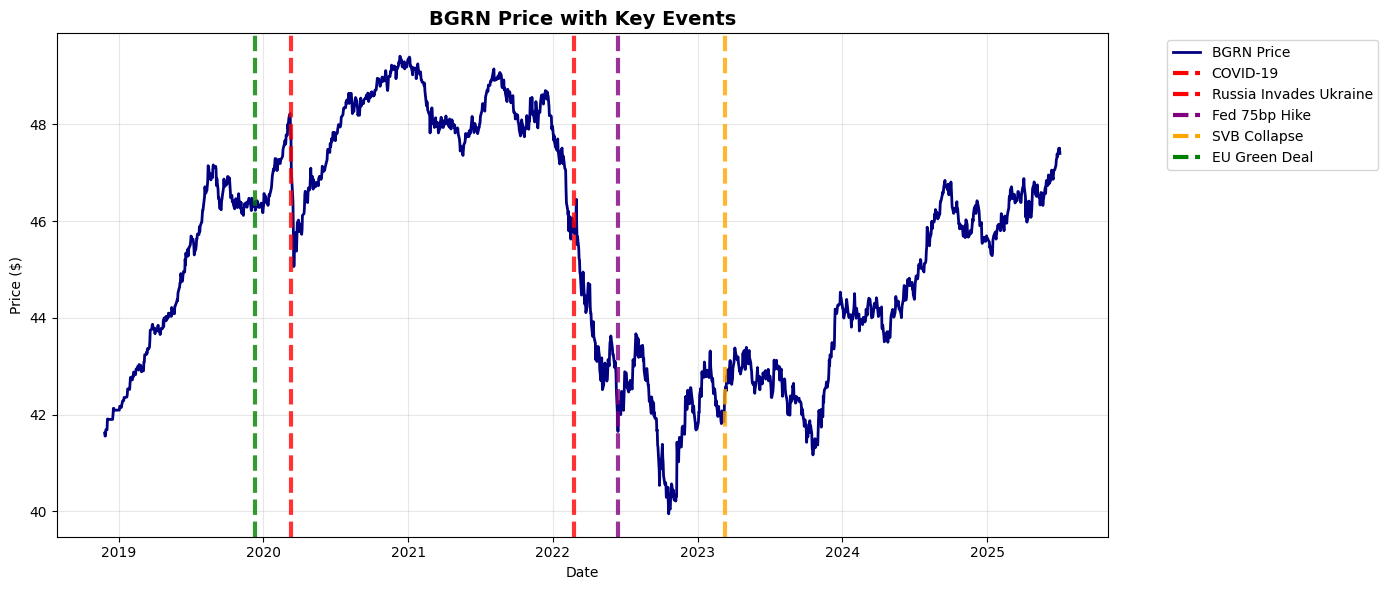

In [187]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(bgrn.index, bgrn[price_col], label='BGRN Price', color='navy', linewidth=2)

legend_handles = []
for date, label in zip(event_dates, event_labels):
    if date >= bgrn.index[0] and date <= bgrn.index[-1]:
        ax.axvline(date, color=event_colors[label], linestyle='--', linewidth=3, alpha=0.8)
        legend_handles.append(Line2D([0], [0], color=event_colors[label], linestyle='--', linewidth=3, label=f"{label}"))

ax.set_title("BGRN Price with Key Events", fontsize=14, fontweight='bold')
ax.set_ylabel("Price ($)")
ax.set_xlabel("Date")
ax.grid(True, alpha=0.3)

ax.legend(handles=[Line2D([0], [0], color='navy', linewidth=2, label='BGRN Price')] + legend_handles,
          bbox_to_anchor=(1.05, 1), loc='upper left')

plot_path_price = os.path.join(bgrn_plots, 'bgrn_price_with_events.png')
plt.savefig(plot_path_price)
print(f"Price plot saved to {plot_path_price}")

plt.tight_layout()
plt.show()

Volatility plot saved to plots\bgrn\bgrn_rolling_volatility_with_events.png


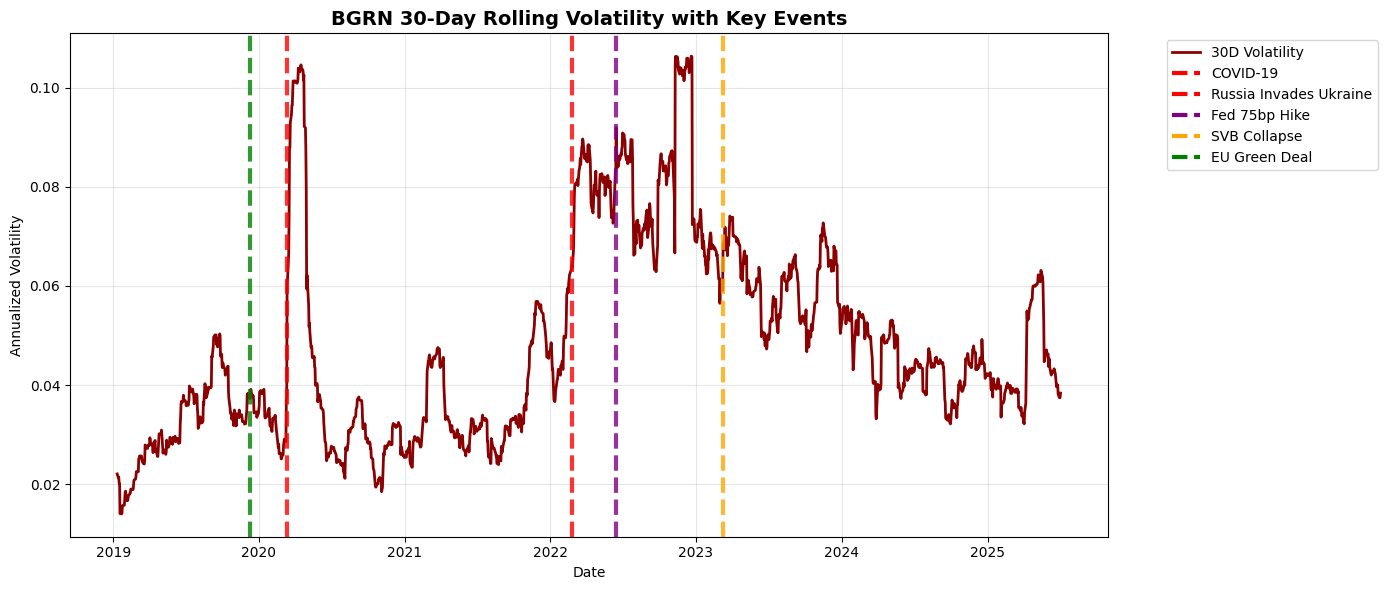

In [188]:
daily_returns = bgrn[price_col].pct_change()
rolling_vol = daily_returns.rolling(30).std() * (252 ** 0.5)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(bgrn.index, rolling_vol, label='30D Volatility', color='darkred', linewidth=2)

legend_handles = []
for date, label in zip(event_dates, event_labels):
    if date >= bgrn.index[0] and date <= bgrn.index[-1]:
        ax.axvline(date, color=event_colors[label], linestyle='--', linewidth=3, alpha=0.8)
        legend_handles.append(Line2D([0], [0], color=event_colors[label], linestyle='--', linewidth=3, label=f"{label}"))

ax.set_title("BGRN 30-Day Rolling Volatility with Key Events", fontsize=14, fontweight='bold')
ax.set_ylabel("Annualized Volatility")
ax.set_xlabel("Date")
ax.grid(True, alpha=0.3)

ax.legend(handles=[Line2D([0], [0], color='darkred', linewidth=2, label='30D Volatility')] + legend_handles,
          bbox_to_anchor=(1.05, 1), loc='upper left')

plot_path_vol = os.path.join(bgrn_plots, 'bgrn_rolling_volatility_with_events.png')
plt.savefig(plot_path_vol)
print(f"Volatility plot saved to {plot_path_vol}")

plt.tight_layout()
plt.show()

Green bonds respond to monetary policy and financial stress, not to green policy events. This directly supports correlation analysis showing BGRN behaves like AGG.